<a href="https://colab.research.google.com/github/juvi-coder/Chronic-Kidney-Disease/blob/main/CKD_Logistic_Regression_Final_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Confusion Matrix Plotting Function -- feel free to save and use later
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics #auc, roc, and other scores
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='magma',     # cmaps = magma, copper, mako, nipy_spectral
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    percent:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual')
        plt.xlabel('Predicted' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


In [15]:
df = pd.read_excel('Chronic Kidney Disease Dataset.xlsx',sheet_name = 1)

In [16]:
df.shape

(5329, 36)

In [17]:
df.columns

Index(['Age', 'age_bucket', 'age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'Racegrp', 'hispa', 'black',
       'white', 'BMI', 'bmi_bucket', 'BMI<18.5', 'BMI(18.5-24.9)',
       'BMI(25-29.9)', 'BMI(>30)', 'Dyslipidemia', 'PVD', 'Activity',
       'Activity1', 'Activity2', 'Activity3', 'Activity4', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD'],
      dtype='object')

In [18]:
df.isna().sum()

Age                 0
age_bucket          0
age(18-34)          0
age(35-49)          0
age(50-64)          0
age(65-74)          0
age(75>)            0
Female              0
Racegrp             0
hispa               0
black               0
white               0
BMI                 0
bmi_bucket          0
BMI<18.5            0
BMI(18.5-24.9)      0
BMI(25-29.9)        0
BMI(>30)            0
Dyslipidemia        0
PVD                 0
Activity            0
Activity1           0
Activity2           0
Activity3           0
Activity4           0
PoorVision          0
Smoker              0
Hypertension        0
Fam Hypertension    0
Diabetes            0
Fam Diabetes        0
Stroke              0
CVD                 0
Fam CVD             0
CHF                 0
CKD                 0
dtype: int64

In [ ]:
df.columns #Columns

Index(['Age', 'age_bucket', 'age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'Racegrp', 'hispa', 'black',
       'white', 'BMI', 'Dyslipidemia', 'PVD', 'Activity', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD'],
      dtype='object')

In [ ]:
df

,Age,age_bucket,age(18-34),age(35-49),age(50-64),age(65-74),age(75>),Female,Racegrp,hispa,...,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,CKD
0,65,age(75>),0,0,0,0,0,1,white,0,...,1,0,0,0,1,0,1,0,0,0
1,36,age(35-49),0,1,0,0,0,1,hispa,1,...,0,0,0,0,0,0,0,0,0,0
2,66,age(75>),0,0,0,0,0,1,white,0,...,1,0,0,1,0,0,0,0,0,0
3,54,age(50-64),0,0,1,0,0,1,white,0,...,1,0,0,0,0,0,0,0,0,0
4,63,age(50-64),0,0,1,0,0,1,black,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,77,age(75>),0,0,0,0,1,0,white,0,...,1,1,0,0,0,0,0,0,0,1
5325,49,age(35-49),0,1,0,0,0,0,white,0,...,0,1,1,0,0,0,0,1,0,0
5326,30,age(18-34),1,0,0,0,0,0,black,0,...,0,0,1,0,1,0,0,1,0,0
5327,75,age(75>),0,0,0,0,1,0,black,0,...,1,1,0,1,1,0,0,0,0,0


In [19]:
df.columns

Index(['Age', 'age_bucket', 'age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'Racegrp', 'hispa', 'black',
       'white', 'BMI', 'bmi_bucket', 'BMI<18.5', 'BMI(18.5-24.9)',
       'BMI(25-29.9)', 'BMI(>30)', 'Dyslipidemia', 'PVD', 'Activity',
       'Activity1', 'Activity2', 'Activity3', 'Activity4', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD'],
      dtype='object')

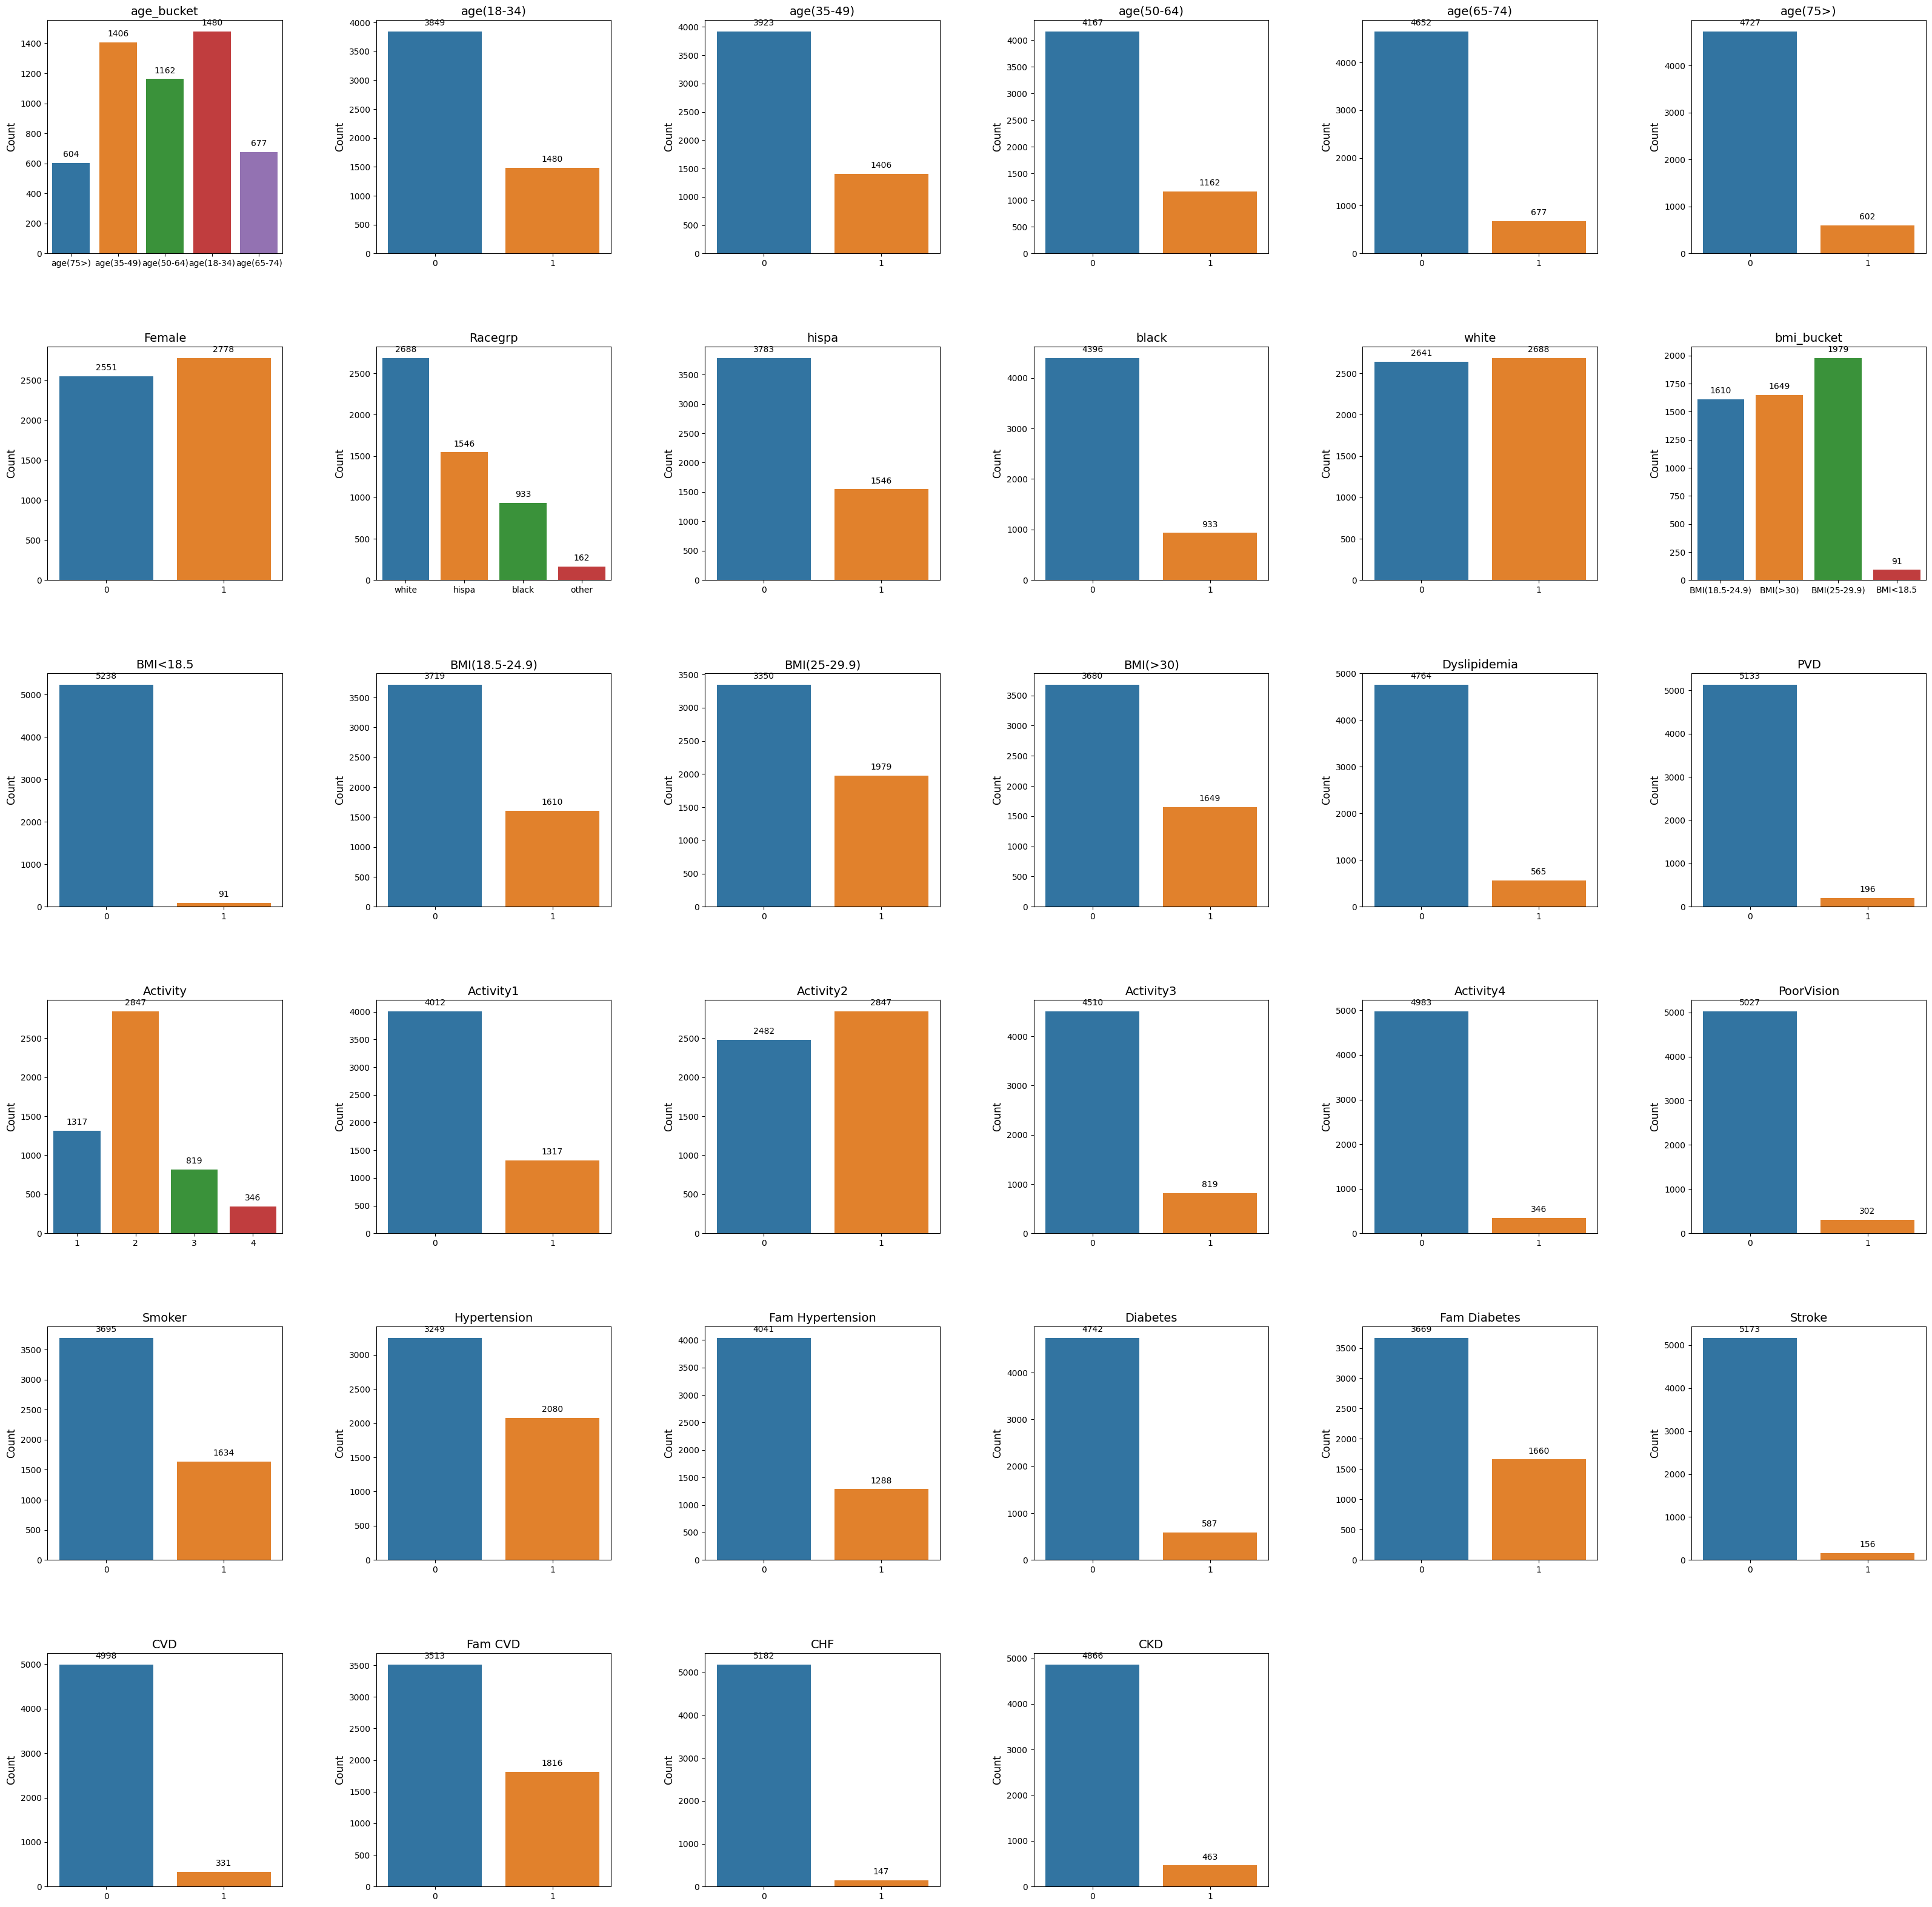

In [21]:


vars_list = ['age_bucket', 'age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'Racegrp', 'hispa', 'black',
       'white', 'bmi_bucket', 'BMI<18.5', 'BMI(18.5-24.9)',
       'BMI(25-29.9)', 'BMI(>30)', 'Dyslipidemia', 'PVD', 'Activity',
       'Activity1', 'Activity2', 'Activity3', 'Activity4', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD']


# Set the figure size and layout
plt.figure(figsize=(40, 40))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop through the variables and create countplots
for i, var in enumerate(vars_list):
    ax = plt.subplot(6,6, i+1) # Set the subplot position
    sns.countplot(x=var, data=df, ax=ax) # Create the countplot
    plt.title(var, fontsize=14) # Set the title font size
    plt.xlabel("") # Remove the x-axis label
    plt.ylabel("Count", fontsize=12) # Set the y-axis label font size
    # Add count values to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10)

plt.show() # Show the plots


Column: Age
Skewness: 0.2436184575069247
The distribution is approximately symmetric
Kurtosis: -1.0631838765845785
The distribution is moderately platykurtic (flat)
Shapiro-Wilk test p-value: 1.0008748497548262e-37
The data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


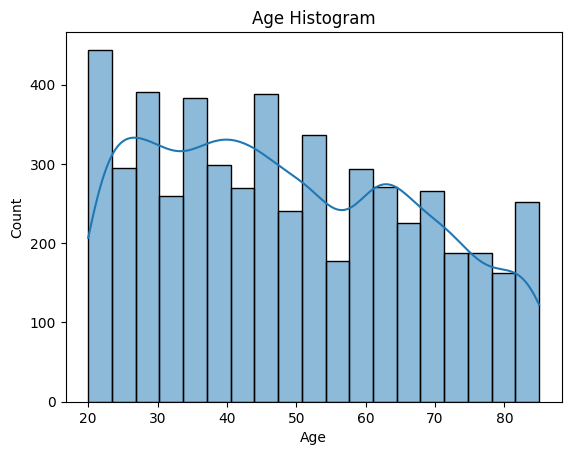

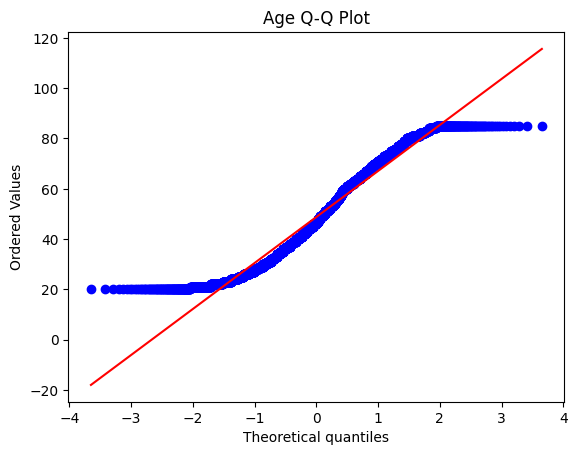


Column: BMI
Skewness: 1.1384288332949026
The distribution is highly right-skewed
Kurtosis: 2.3580595563991418
The distribution is highly leptokurtic (peaked)
Shapiro-Wilk test p-value: 4.601864156842699e-42
The data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


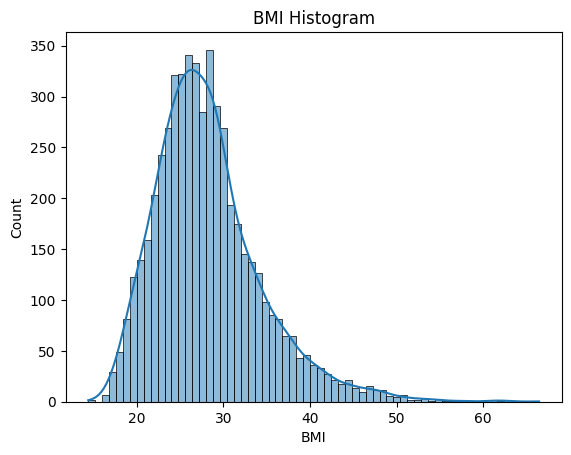

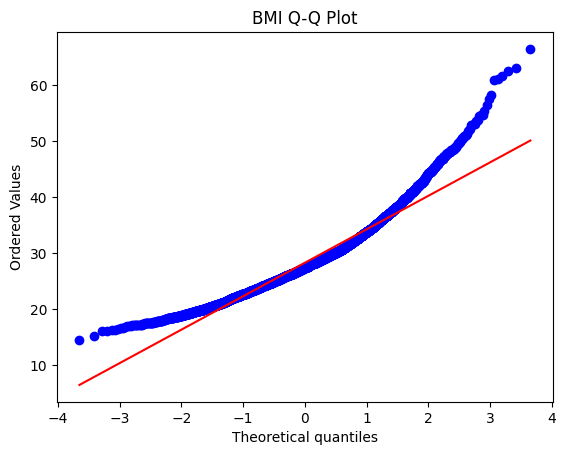


Column: Activity
Skewness: 0.6612683883001003
The distribution is moderately right-skewed
Kurtosis: 0.18227351535983338
The distribution is approximately mesokurtic (normal)
Shapiro-Wilk test p-value: 0.0
The data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


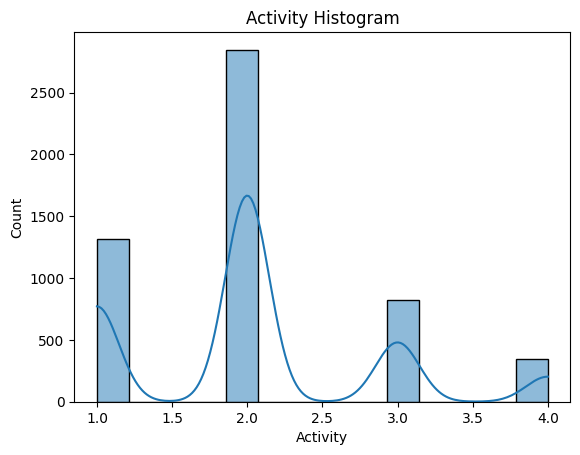

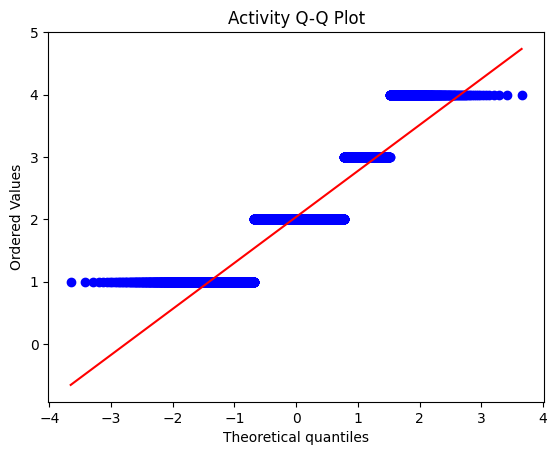

In [22]:

# Load your dataset as a Pandas DataFrame
df_num = df[['Age','BMI', 'Activity' ]]

# Loop over each column in the DataFrame
for col in df_num.columns:
    # Calculate skewness and kurtosis
    skewness = skew(df_num[col])
    kurt = kurtosis(df_num[col])

    # Print the results
    print("Column:", col)
    print("Skewness:", skewness)
    if skewness < -1:
        print("The distribution is highly left-skewed")
    elif -1 <= skewness < -0.5:
        print("The distribution is moderately left-skewed")
    elif -0.5 <= skewness < 0.5:
        print("The distribution is approximately symmetric")
    elif 0.5 <= skewness < 1:
        print("The distribution is moderately right-skewed")
    else:
        print("The distribution is highly right-skewed")

    print("Kurtosis:", kurt)
    if kurt < -2:
        print("The distribution is highly platykurtic (flat)")
    elif -2 <= kurt < -1:
        print("The distribution is moderately platykurtic (flat)")
    elif -1 <= kurt < 1:
        print("The distribution is approximately mesokurtic (normal)")
    elif 1 <= kurt < 2:
        print("The distribution is moderately leptokurtic (peaked)")
    else:
        print("The distribution is highly leptokurtic (peaked)")

    # Perform Shapiro-Wilk test for normality
    stat, p = shapiro(df[col])
    print("Shapiro-Wilk test p-value:", p)
    if p > 0.05:
        print("The data is normally distributed")
    else:
        print("The data is not normally distributed")

    # Create histogram
    sns.histplot(df[col], kde=True)
    plt.title(col + ' Histogram')
    plt.show()

    # Create Q-Q plot
    fig, ax = plt.subplots()
    stats.probplot(df[col], plot=ax)
    ax.set_title(col + ' Q-Q Plot')
    plt.show()

    print()


In [23]:
df.columns

Index(['Age', 'age_bucket', 'age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'Racegrp', 'hispa', 'black',
       'white', 'BMI', 'bmi_bucket', 'BMI<18.5', 'BMI(18.5-24.9)',
       'BMI(25-29.9)', 'BMI(>30)', 'Dyslipidemia', 'PVD', 'Activity',
       'Activity1', 'Activity2', 'Activity3', 'Activity4', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD'],
      dtype='object')

In [24]:


# read in your dataset as a Pandas DataFrame


# set the name of your target variable
target_var = 'CKD'

# create a list of your independent categorical variables
cat_vars = ['age_bucket', 'age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'Racegrp', 'hispa', 'black',
       'white', 'bmi_bucket', 'BMI<18.5', 'BMI(18.5-24.9)',
       'BMI(25-29.9)', 'BMI(>30)', 'Dyslipidemia', 'PVD', 'Activity',
       'Activity1', 'Activity2', 'Activity3', 'Activity4', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF']


# loop through each independent variable and perform chi-square test
for var in cat_vars:
    # create a cross-tabulation table between the independent variable and the target variable
    cross_tab = pd.crosstab(index=df[target_var], columns=df[var])

    # perform chi-square test and print the results
    chi2, p_val, dof, expected = chi2_contingency(cross_tab)
    print(f'Chi-square test for {var} vs {target_var}:')
    print('Chi-square statistic: ', chi2)
    print('p-value: ', p_val)
    print('Degrees of freedom: ', dof)
    print('Expected frequencies: \n', expected)
    print('\n')

    # determine the significance of the relationship
    if p_val < 0.05:
        print('There is a significant relationship between the variables.')
    else:
        print('There is no significant relationship between the variables.')
    print('\n')

    # print the cross-tabulation table
    print('Cross-tabulation table:')
    print(cross_tab)
    print('\n\n\n\n')


Chi-square test for age_bucket vs CKD:
Chi-square statistic:  1158.353363560706
p-value:  1.6995084396049325e-249
Degrees of freedom:  4
Expected frequencies: 
 [[1351.41302308 1283.84237193 1061.0418465   618.18014637  551.52261212]
 [ 128.58697692  122.15762807  100.9581535    58.81985363   52.47738788]]


There is a significant relationship between the variables.


Cross-tabulation table:
age_bucket  age(18-34)  age(35-49)  age(50-64)  age(65-74)  age(75>)
CKD                                                                 
0                 1477        1386        1096         557       350
1                    3          20          66         120       254





Chi-square test for age(18-34) vs CKD:
Chi-square statistic:  184.50096075085952
p-value:  5.043631542811274e-42
Degrees of freedom:  1
Expected frequencies: 
 [[3514.58697692 1351.41302308]
 [ 334.41302308  128.58697692]]


There is a significant relationship between the variables.


Cross-tabulation table:
age(18-34)    

In [25]:
df.columns

Index(['Age', 'age_bucket', 'age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'Racegrp', 'hispa', 'black',
       'white', 'BMI', 'bmi_bucket', 'BMI<18.5', 'BMI(18.5-24.9)',
       'BMI(25-29.9)', 'BMI(>30)', 'Dyslipidemia', 'PVD', 'Activity',
       'Activity1', 'Activity2', 'Activity3', 'Activity4', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'CKD'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


X = df[['age(18-34)', 'age(35-49)', 'age(50-64)',
       'age(65-74)', 'age(75>)', 'Female', 'hispa', 'black',
       'white',  'BMI(18.5-24.9)',
       'BMI(25-29.9)', 'BMI(>30)',  'PVD',
       'Activity1', 'Activity2', 'Activity3', 'Activity4', 'PoorVision',
       'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes',
       'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF']]

y = df['CKD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = logreg.predict(X_test)

# Calculate the model metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Output the model metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", confusion)
print('Classification report:\n', classification_report(y_test, y_pred))



odds_ratios = np.exp(logreg.coef_[0])

# Create a dataframe to store the results
results_df = pd.DataFrame({'Odds Ratio': odds_ratios}, index=X.columns)

# Sort the dataframe by descending order of odds ratio
results_df = results_df.sort_values(by='Odds Ratio', ascending=False)

# Print the sorted dataframe
print(results_df)



Accuracy: 0.9130706691682301
Precision: 0.5531914893617021
Recall: 0.18055555555555555
F1 Score: 0.27225130890052357
ROC AUC Score: 0.583061282932417
Confusion Matrix:
 [[1434   21]
 [ 118   26]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      1455
           1       0.55      0.18      0.27       144

    accuracy                           0.91      1599
   macro avg       0.74      0.58      0.61      1599
weighted avg       0.89      0.91      0.89      1599

                  Odds Ratio
age(75>)            7.880768
age(65-74)          3.295875
PVD                 1.814514
Diabetes            1.794907
Activity1           1.778074
Hypertension        1.745791
CVD                 1.685008
CHF                 1.576759
Fam CVD             1.214272
Female              1.200594
Stroke              1.182001
PoorVision          1.178198
Smoker              1.154170
Activity2           1.037008
white             

AUC- 58.31


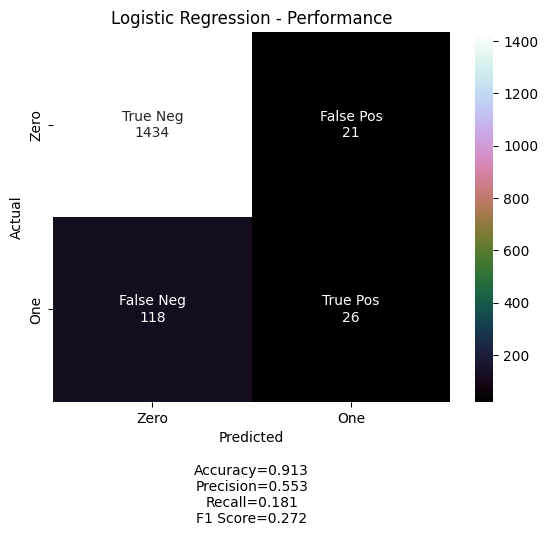

In [44]:
# Plot Confusion Matrix
model_name = 'Logistic Regression'
cm = confusion_matrix(y_test, y_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, y_pred) *100:.2f}")

In [ ]:
# Load the new dataset (assuming it has the same column names as the original dataset)
new_data = pd.read_excel('Final Kindey.xlsx', sheet_name= 1)

# Extract the features from the new dataset
X_new = new_data[['Age','White', 'Black', 'Hispa', 'Other','BMI','PVD', 'Activity',
       'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension', 'Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF']]

# Predict the target variable for the new dataset
y_new = logreg.predict(X_new)

# Print the predicted target variable for the new dataset
print(y_new)


[0 0 0 ... 0 0 0]


In [ ]:
new_data['CKD_Predicted'] = y_new

# Save the new dataset with the predicted values
new_data.to_csv('new_data_with_predictions.csv', index=False)

AUC- 55.04


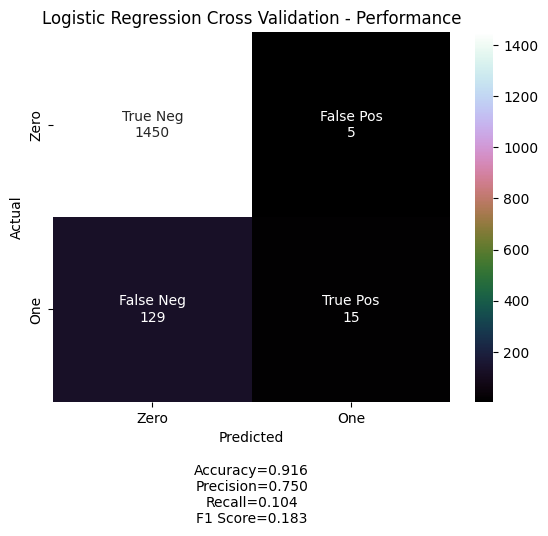

In [45]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import make_classification


# Define the logistic regression model with cross-validation
logreg_cv = LogisticRegressionCV(cv=10, max_iter=10000, random_state=42)

# Fit the model to the data
logreg_cv.fit(X_train, y_train)

lr_pred = logreg_cv.predict(X_test)

# Plot Confusion Matrix
model_name = 'Logistic Regression Cross Validation'
cm = confusion_matrix(y_test, lr_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, lr_pred) *100:.2f}")




In [46]:

coef = logreg_cv.coef_


odds_ratios = np.exp(coef)


feature_names = X.columns


odds_ratios_dict = {feature_names[i]: odds_ratios[0][i] for i in range(len(feature_names))}

# Sort the odds ratios in descending order
sorted_odds_ratios = sorted(odds_ratios_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted odds ratios
print("Sorted Odds Ratios:")
for feature, odds_ratio in sorted_odds_ratios:
    print(f"{feature}: {odds_ratio}")


Sorted Odds Ratios:
age(75>): 3.6962890887270103
Hypertension: 1.9712779179091076
age(65-74): 1.7681958762148147
Diabetes: 1.601890927666631
CVD: 1.5842323157690579
Activity1: 1.5225557009086015
PVD: 1.5073329735704355
CHF: 1.3580420808940985
white: 1.264404217651998
Stroke: 1.2425602834784504
PoorVision: 1.2053862264171662
Smoker: 1.1881986657224224
Female: 1.1503163614247849
BMI(25-29.9): 1.0618939401565364
BMI(>30): 1.0330749553103182
black: 1.0116302963314017
Fam Diabetes: 0.9828433236187372
Activity2: 0.964215969563225
Fam CVD: 0.9211051485901093
BMI(18.5-24.9): 0.8620271710391951
Activity4: 0.8343593838226008
Activity3: 0.8164603310763496
Fam Hypertension: 0.8119701839466874
hispa: 0.7705230258700092
age(50-64): 0.7309177178191267
age(35-49): 0.5022630069217674
age(18-34): 0.4210166849765338
